In [2]:
import pandas as pd
import numpy as np

In [3]:
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1)
    
    figsize = (10, 7)
    
    if labels is not None:
        components_with_labels_df.plot(kind='skatter', x='component_1', y='component_2',
                                      c=components_with_labels_df.iloc[:, -1], cmap=plt.get_cmap('jet'),
                                      alpha=.5, figsize=figsize)
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=figsize)
        
    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')
    plt.show()

In [4]:
import tensorflow as tf

In [5]:
(X, y), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [6]:
X.shape

(60000, 28, 28)

In [7]:
X = X[:1000]

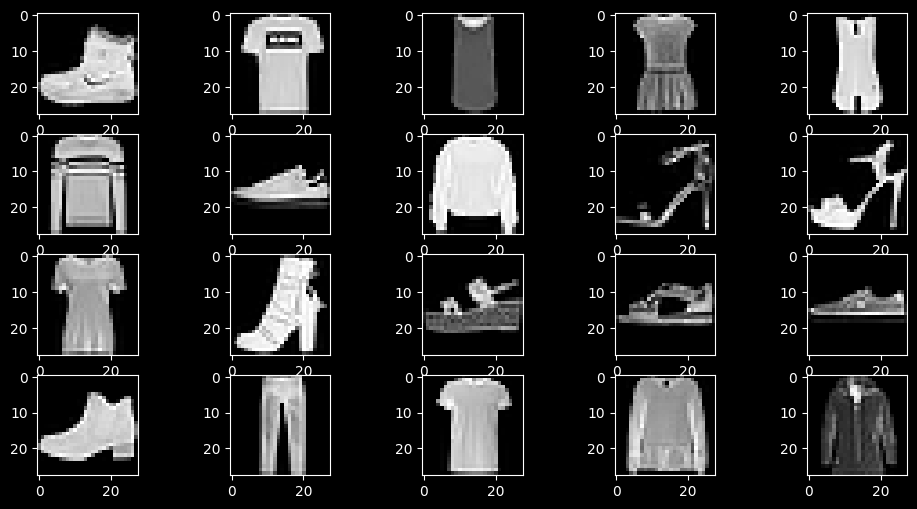

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

plt.figure(figsize=(12, 6))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X[i, :], cmap='gray')

In [33]:
X = X.reshape(X.shape[0], -1)
X.shape

(1000, 784)

In [34]:
X.min(axis=0)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [38]:
X.max(axis=0)[:10]

array([  0,   2,  52,  55,  54, 170, 195, 170, 181, 237], dtype=uint8)

#### MinMaxScaler (нормализация)<br>
$\frac{x_{i}-min}{max - min}$<br><br>
Лучшие результаты показывает при работе с расстояниями (KNN) соседи.

#### StandardScaler (стандартизация)<br>
$Z =\frac{x_{i}-mean}{std}$<br><br>
Лучшие результаты в линейных моделях.

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [42]:
X.min(axis=0)[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
X.max(axis=0)[:10]

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

#### Dimension reduction (понижение размерности)

In [45]:
X.shape

(1000, 784)

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(1000, 2)

In [46]:
X_reduced

array([[-0.64971007,  6.20319324],
       [ 5.80151698, -1.59297026],
       [-2.48472711, -4.46102386],
       ...,
       [-3.72759515, -3.68456522],
       [-2.01539828,  5.11053922],
       [-0.60950166,  5.34276344]])

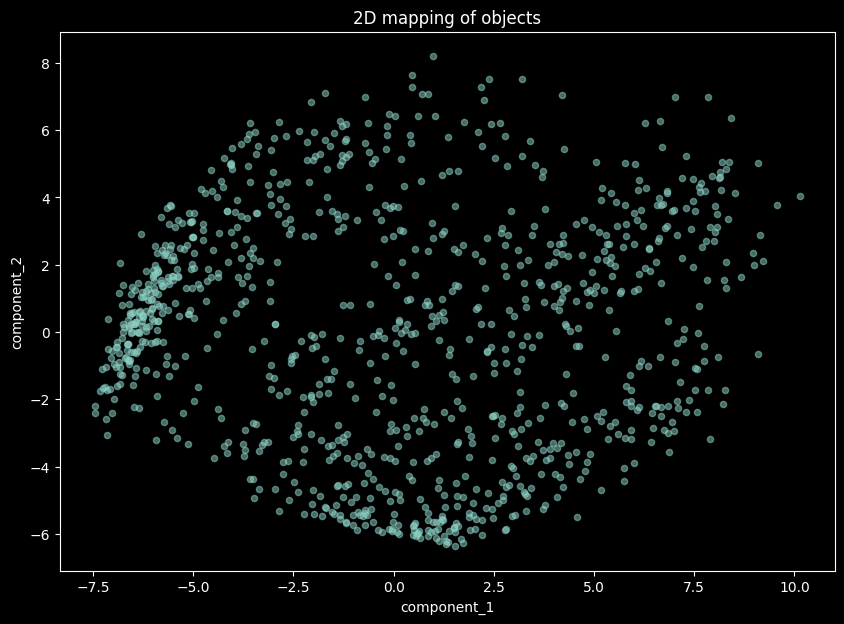

In [50]:
dims = 2
colnames = ['component_' + str(i) for i in range(1, dims+1)]
components_X_reduced = pd.DataFrame(data=X_reduced, columns=colnames)
components_X_reduced.head()

display_components_in_2D_space(components_X_reduced)

#### TSNE

In [52]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17, perplexity=20) # 1 - 50

X_tsne = tsne.fit_transform(X)

C:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: total: 25.7 s
Wall time: 2.52 s


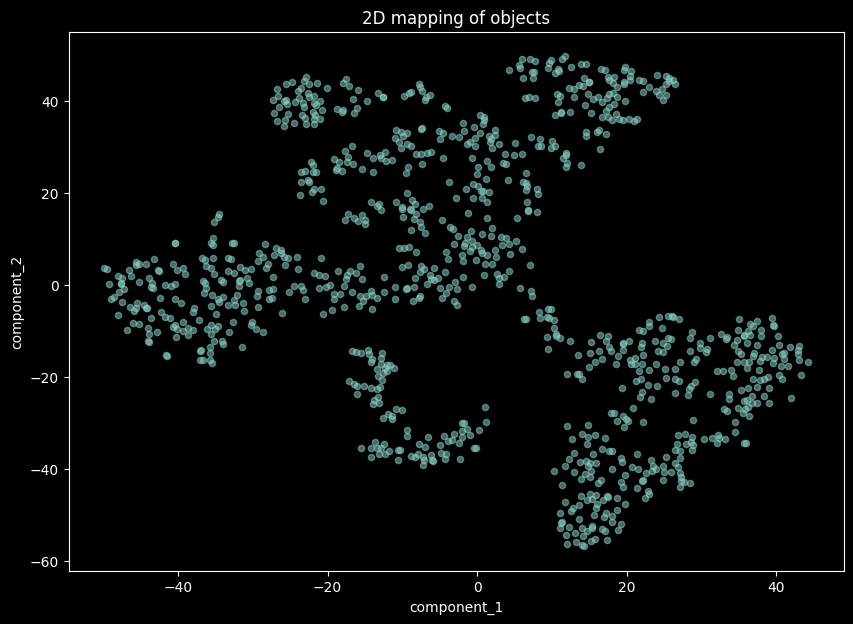

In [55]:
dims = 2
colnames = [f'component_{i}' for i in range(1, dims+1)]
components_X_tsne = pd.DataFrame(data=X_tsne, columns=colnames)
components_X_tsne.head()

display_components_in_2D_space(components_X_tsne)